# Regressão Linear com NumPy

## Objetivos deste experimento

Este exemplo utiliza regressão linear para estimar o comprimento das sépalas da íris a partir do seu comprimento das pétalas.
Utiliza-se programação totalmente NumPy com:
- o **cálculo do gradiente**, 
- a **função de perda** e
- a atualização dos parâmetros são feitos de forma explícita.
- A rede é criada com uma camada como uma classe

![alt text](https://raw.githubusercontent.com/vcasadei/images/master/RegressaoLinear_Otimizacao.png)

## Importação dos pacotes

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt   # para plotting

from sklearn.datasets import load_iris  # para carregar dataset

import numpy as np  # processamento matricial

np.random.seed(1234)

## Dataset

### Leitura dos dados

In [11]:
iris = load_iris()
data = iris.data[iris.target==1,::2]  # comprimento das sépalas e pétalas, indices 0 e 2

x_train = data[:,0:1]
y_train = data[:,1:2]

n_samples = x_train.shape[0]
print('x_train.shape:',x_train.shape, x_train.dtype)
print('y_train.shape:',y_train.shape, y_train.dtype)

print('x_train[:5]:\n', x_train[:5])
print('y_train[:5]:\n', y_train[:5])

x_train.shape: (50, 1) float64
y_train.shape: (50, 1) float64
x_train[:5]:
 [[7. ]
 [6.4]
 [6.9]
 [5.5]
 [6.5]]
y_train[:5]:
 [[4.7]
 [4.5]
 [4.9]
 [4. ]
 [4.6]]


### Normalização dos dados

In [12]:
x_train_before = data[:,0:1]
y_train_before = data[:,1:2]

In [13]:
x_train -= x_train.min()
x_train /= x_train.max()
y_train -= y_train.min()
y_train /= y_train.max()

Text(0, 0.5, 'Comprimento petalas')

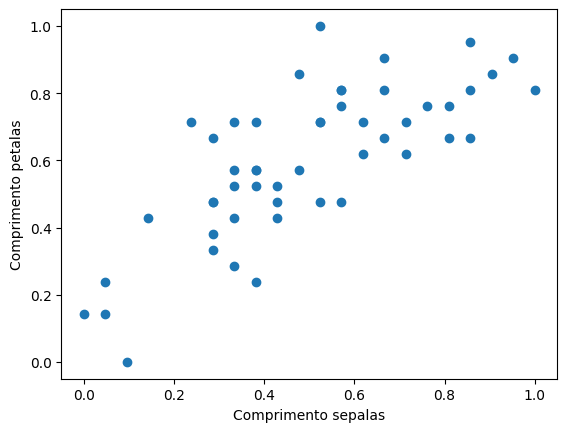

In [14]:
plt.scatter(x_train,y_train)
plt.xlabel('Comprimento sepalas')
plt.ylabel('Comprimento petalas')

Text(0, 0.5, 'Comprimento petalas')

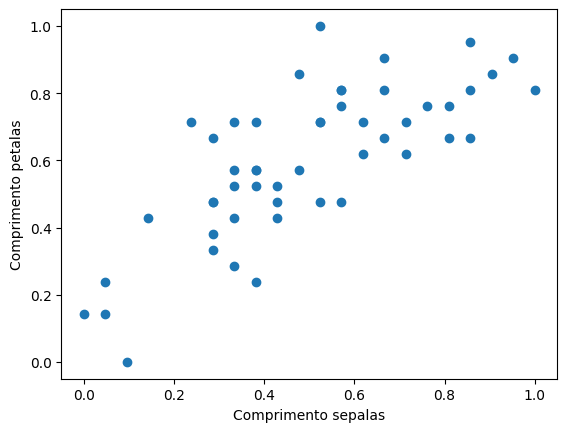

In [15]:
plt.scatter(x_train_before,y_train_before)
plt.xlabel('Comprimento sepalas')
plt.ylabel('Comprimento petalas')

## Modelo da rede

### Reta de ajuste

A equação da reta no plano necessita de dois parâmetros, aqui denominados $w_0$ (*bias*) e inclinação $w_1$. Veja figura:

![alt text](https://raw.githubusercontent.com/vcasadei/images/master/linhareta.png)

A reta de ajuste será dada por:

$$ \hat{y} = w_0 + w_1 x $$

onde 
* $w_1$ é o coeficiente angular da reta e 
* $w_0$ é a interseção do eixo vertical quando x é igual a zero, também denominado de *bias*.
* $x$ é a variável de entrada (comprimento das sépalas) e 
* $\hat{y}$ é a predição (comprimento estimado das pétalas).

### Linear Regression Model

![alt text](https://raw.githubusercontent.com/vcasadei/images/master/RegressaoLinearNeuronio.png)

### Formulação matricial do neurônio

* $\mathbf{w} = [w_0 \ w_1]$ é vetor linha de parâmetros e 
* $\mathbf{x} = [1 \ x_0] $ é vetor linha de uma amostra (com *bias*).

$$ \hat{y} = 1 w_0 + x_0 w_1 $$

$$ [\hat{y}] = [1 \ x_0] \begin{bmatrix} w_0 \\ w_1 \end{bmatrix} $$

$$ \mathbf{\hat{y}} = \mathbf{x} \mathbf{w^T} $$

### Fazendo o predict de várias amostras

$$ \begin{matrix} 
\begin{bmatrix}
\hat{y}_0\\ 
\hat{y}_1\\
\\
\hat{y}_{M-1} 
\end{bmatrix} &=& \begin{bmatrix}
1 & x_0 \\ 
1 & x_1\\
\\ 
1 & x_{M-1} \\ 
\end{bmatrix}
&
\begin{bmatrix}
w_0\\ 
w_1
\end{bmatrix} \\
(M,1) & & (M,2) & (2,1) \\
\end{matrix} $$

### Preenchendo x com coluna de 1's para bias

In [17]:
x_train_bias = np.hstack([np.ones(shape=(n_samples,1)), x_train])

In [18]:
x_train_bias

array([[1.        , 1.        ],
       [1.        , 0.71428571],
       [1.        , 0.95238095],
       [1.        , 0.28571429],
       [1.        , 0.76190476],
       [1.        , 0.38095238],
       [1.        , 0.66666667],
       [1.        , 0.        ],
       [1.        , 0.80952381],
       [1.        , 0.14285714],
       [1.        , 0.04761905],
       [1.        , 0.47619048],
       [1.        , 0.52380952],
       [1.        , 0.57142857],
       [1.        , 0.33333333],
       [1.        , 0.85714286],
       [1.        , 0.33333333],
       [1.        , 0.42857143],
       [1.        , 0.61904762],
       [1.        , 0.33333333],
       [1.        , 0.47619048],
       [1.        , 0.57142857],
       [1.        , 0.66666667],
       [1.        , 0.57142857],
       [1.        , 0.71428571],
       [1.        , 0.80952381],
       [1.        , 0.9047619 ],
       [1.        , 0.85714286],
       [1.        , 0.52380952],
       [1.        , 0.38095238],
       [1.

### Classe com o modelo da rede

In [19]:
class Net():
    def __init__(self, n_in, n_out):
        self.w = np.random.uniform(-0.1,0.1,(n_out,n_in)) #inicialização dos parâmetros
    
    def forward(self, x_bias):
        return x_bias.dot(self.w.T)

### Criando a rede, instanciando o objeto model

In [55]:
model = Net(2,1) # duas entradas (1 + x0) e uma saída y_pred

In [56]:
print(model.w)

[[ 0.09640095 -0.07521146]]


### Testando o predict da rede (mesmo sem treiná-la)

In [57]:
xin = np.random.randn(4,2) # 4 amostras, 2 entradas (1 + x0)
xin

array([[ 0.34769363, -0.55482619],
       [-0.80465974,  2.47641856],
       [-0.24547838, -0.35616132],
       [-0.18317626,  0.88008699]])

In [58]:
ypred = model.forward(xin)
ypred

array([[ 0.07524728],
       [-0.26382502],
       [ 0.00312306],
       [-0.08385099]])

## Treinamento via gradiente descendente

Função de perda:
$$ J(\hat{y_i},y_i) = \frac{1}{M} \sum_{i=0}^{M-1} (\hat{y_i} - y_i)^2 $$

Gradiente:
$$  \mathbf{\nabla{J_w}} = \frac{2}{M}\mathbf{x^T}(\mathbf{x w^T} - \mathbf{y}) $$

Atualização dos parâmetros pelo gradiente descendente:
$$ \mathbf{w} = \mathbf{w} − \eta (\mathbf{\nabla J_w})^T $$

### Laço de treinamento

In [59]:
num_epochs = 100
learning_rate = 0.5
losses = []
epochs = []
for epoch in range(num_epochs):

    # forward - predict
    y_pred = model.forward(x_train_bias)

    #loss cálculo da função de perda
    loss = np.square(y_pred - y_train).mean()
    losses.append(loss)
    
    # cálculo do gradiente pelas derivadas parciais
    w_grad = (2.0/n_samples) * (x_train_bias.T).dot(x_train_bias.dot(model.w.T) - y_train)
    
    # gradiente descendente
    model.w = model.w - learning_rate * w_grad.T

    epochs.append(epoch)
    
    # verbose
    if (epoch+1) % 1 == 0:
        print('Epoch[{}/{}], loss: {:.6f}'
              .format(epoch+1, num_epochs, loss))

Epoch[1/100], loss: 0.347879
Epoch[2/100], loss: 0.056818
Epoch[3/100], loss: 0.036509
Epoch[4/100], loss: 0.033985
Epoch[5/100], loss: 0.032732
Epoch[6/100], loss: 0.031663
Epoch[7/100], loss: 0.030696
Epoch[8/100], loss: 0.029819
Epoch[9/100], loss: 0.029022
Epoch[10/100], loss: 0.028299
Epoch[11/100], loss: 0.027642
Epoch[12/100], loss: 0.027046
Epoch[13/100], loss: 0.026505
Epoch[14/100], loss: 0.026013
Epoch[15/100], loss: 0.025567
Epoch[16/100], loss: 0.025162
Epoch[17/100], loss: 0.024795
Epoch[18/100], loss: 0.024461
Epoch[19/100], loss: 0.024158
Epoch[20/100], loss: 0.023882
Epoch[21/100], loss: 0.023632
Epoch[22/100], loss: 0.023406
Epoch[23/100], loss: 0.023200
Epoch[24/100], loss: 0.023013
Epoch[25/100], loss: 0.022843
Epoch[26/100], loss: 0.022689
Epoch[27/100], loss: 0.022549
Epoch[28/100], loss: 0.022422
Epoch[29/100], loss: 0.022306
Epoch[30/100], loss: 0.022202
Epoch[31/100], loss: 0.022107
Epoch[32/100], loss: 0.022020
Epoch[33/100], loss: 0.021942
Epoch[34/100], loss

In [41]:
print(model.w)

[[0.26135736 0.6864393 ]]


## Avaliação

### Predict

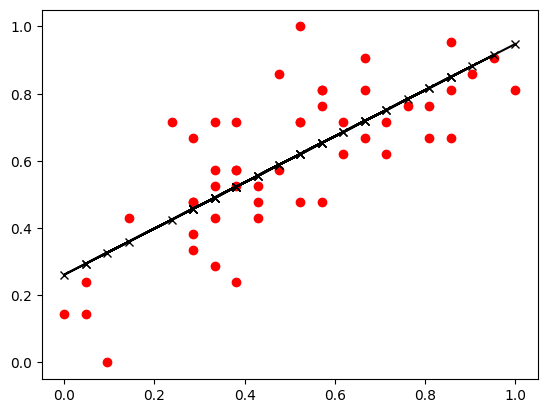

In [42]:
y_pred = model.forward(x_train_bias)
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, y_pred, 'kx-', label='Fitting Line')

### Parâmetros treinados

In [43]:
print(model.w)

[[0.26135736 0.6864393 ]]


### Avaliação do modelo

In [44]:
loss = np.square(y_pred - y_train).mean()
loss

0.021169424174586338

### Valor ótimo, solução analítica

$$  \mathbf{w} =(\mathbf{x^T} \mathbf{x})^{−1}\mathbf{x^T} \mathbf{y} $$

In [45]:
x = x_train_bias
y = y_train
w_opt = (np.linalg.inv((x.T).dot(x)).dot(x.T)).dot(y)
print(w_opt.T)

[[0.26134159 0.68646976]]


In [46]:
print(model.w)

[[0.26135736 0.6864393 ]]


# Exercícios

## Questões

1. Quantos parâmetros são treinados nesse modelo?

R.: 2 parâmetros (w0,w1)

2. Qual é o número de atributos de entrada para a rede?

R.: 2, sendo 1 deles o bias

3. Qual é o número de saídas da rede?

R.: 1 saída, y

4. Suponha que eu tenha agora 5 mil amostras para fazer a predição. Qual é o shape da matriz de entrada? 
   Qual é o shape do matriz de saída?

R.:[5000, 2]

## Atividades

1. Modifique o laço do treinamento via gradiente descendente para guardar em uma lista, o valor da perda no final
   de cada época. Após o treinamento, plote o valor da perda em função da época.
2. Calcule o valor da perda (MSE) da rede com os parâmetros inicializados, sem serem treinados.
3. Coloque os valores dos pesos da solução ótima analítica no modelo da rede e calcule o valor da perda (MSE) e
   compare com o valor da perda obtida pelo método da otimização via gradiente descendente.

[0.34787914043007206, 0.05681790711691871, 0.036508590025202896, 0.033985071544451524, 0.03273230327325012, 0.03166265528196929, 0.030695939523887238, 0.029818544851182138, 0.029021975425978924, 0.028298769807120247, 0.027642170175732735, 0.027046042168022623, 0.026504816453783567, 0.02601343663244289, 0.025567311988918852, 0.025162274604565087, 0.024794540418378305, 0.024460673874414206, 0.02415755582511236, 0.02388235439066606, 0.023632498502190444, 0.02340565388151636, 0.02319970123320088, 0.023012716445013633, 0.022842952611921902, 0.022688823715633622, 0.02254888980722448, 0.02242184355441779, 0.02230649802783513, 0.022201775612110865, 0.02210669793827265, 0.022020376743331068, 0.02194200557168438, 0.021870852240808567, 0.02180625200084345, 0.021747601324168392, 0.021694352266946635, 0.02164600734996101, 0.021602114910915307, 0.021562264884780132, 0.02152608497276109, 0.021493237164098046, 0.02146341457820022, 0.021436338597614818, 0.02141175626504404, 0.021389437920091976, 0.0213

<ipython-input-62-e4c83c4fc898>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


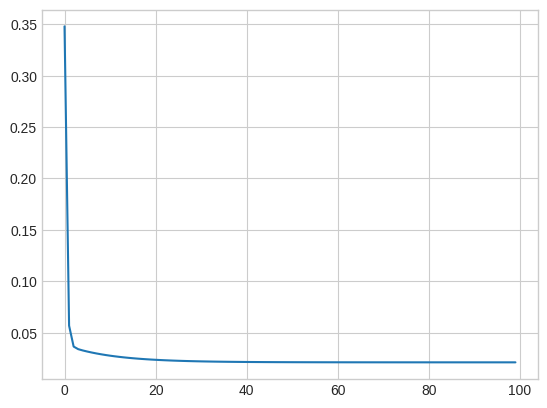

In [62]:
#Exercicio 1

print(losses)
print(epochs)

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.plot(epochs, losses)

# Aprendizados